In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from rfms.readers import ForestReader
from rfms.storytellers import individual_signed_feature_importance, oob_feature_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/enhancer.csv', index_col=0)
data.head()

,H3_c12,H3_c14a,H3_c14c,H3_c8,H3K18ac_c12,H3K18ac_c14a,H3K18ac_c14c,H3K18ac_c8,H3K27ac_c12,H3K27ac_c14a,H3K27ac_c14c,H3K27ac_c8,H3K27me3_c12,H3K27me3_c14a,H3K27me3_c14c,H3K36me3_c12,H3K36me3_c14a,H3K36me3_c14c,H3K4me1_c12,H3K4me1_c14a,H3K4me1_c14c,H3K4me1_c8,H3K4me3_c12,H3K4me3_c14a,H3K4me3_c14c,H3K4me3_c8,H3K9ac_c12,H3K9ac_c14a,H3K9ac_c14c,H3K9ac_c8,H4K5ac_c12,H4K5ac_c14a,H4K5ac_c14c,H4K5ac_c8,H4K8ac_c12,H4K8ac_c14a,H4K8ac_c14c,H4K8ac_c8,input_c12,input_c14a,...,input_c8,wt_H3,wt_H3K18ac,wt_H3K4me1,wt_ZLD,bcd1,bcd2,cad1,D1,da2,dl3,ftz3,gt2,h1,h2,hb1,hb2,hkb1,hkb2,hkb3,kni1,kni2,kr1,kr2,mad2,med2,prdBQ,prdFQ,run1,run2,shn2,shn3,slp1,sna1,sna2,tll1,twi1,twi2,z2,active
VT0002,6,10,10,8,5,7,8,9,12,17,11,22,21,9,30,16,87,225,18,8,12,0,18,15,13,8,7,24,5,1,10,7,6,32,5,7,4,1,20,15,...,8,10.95,30.858,111.180,42.780,0.0,0.0,0.00000,1.42103,0.00000,1.46536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0003,6,7,6,5,19,10,11,0,4,15,33,7,26,39,18,31,100,267,6,4,10,5,21,26,14,0,5,10,17,0,10,7,4,28,4,7,4,1,13,19,...,11,10.55,55.500,48.144,13.020,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0004,14,9,14,13,11,9,19,10,1,15,16,0,10,23,31,25,107,203,12,10,19,11,43,44,14,40,13,26,7,7,10,7,3,32,6,3,6,5,19,27,...,7,19.00,51.060,78.132,3.100,0.0,0.0,0.00000,0.00000,0.00000,1.10347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20130,0
VT0005,13,17,13,13,19,14,25,10,29,20,20,14,18,29,41,39,23,162,22,23,67,5,42,63,57,72,7,38,67,17,13,7,5,48,6,10,12,2,21,18,...,9,40.15,50.949,140.760,170.376,0.0,0.0,0.00000,1.34335,1.22641,1.55161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.40716,1.53646,0.0,1.2486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0006,6,6,6,10,13,23,28,10,8,69,68,14,18,34,12,12,7,18,9,39,67,7,16,94,316,44,7,133,354,13,7,7,13,40,7,11,12,4,17,13,...,9,32.10,48.840,140.760,249.240,0.0,0.0,1.96369,1.58797,1.22641,1.98438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.48812,1.53646,0.0,1.6266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.21019,1


In [4]:
data.iloc[:,:-1].head()

,H3_c12,H3_c14a,H3_c14c,H3_c8,H3K18ac_c12,H3K18ac_c14a,H3K18ac_c14c,H3K18ac_c8,H3K27ac_c12,H3K27ac_c14a,H3K27ac_c14c,H3K27ac_c8,H3K27me3_c12,H3K27me3_c14a,H3K27me3_c14c,H3K36me3_c12,H3K36me3_c14a,H3K36me3_c14c,H3K4me1_c12,H3K4me1_c14a,H3K4me1_c14c,H3K4me1_c8,H3K4me3_c12,H3K4me3_c14a,H3K4me3_c14c,H3K4me3_c8,H3K9ac_c12,H3K9ac_c14a,H3K9ac_c14c,H3K9ac_c8,H4K5ac_c12,H4K5ac_c14a,H4K5ac_c14c,H4K5ac_c8,H4K8ac_c12,H4K8ac_c14a,H4K8ac_c14c,H4K8ac_c8,input_c12,input_c14a,input_c14c,input_c8,wt_H3,wt_H3K18ac,wt_H3K4me1,wt_ZLD,bcd1,bcd2,cad1,D1,da2,dl3,ftz3,gt2,h1,h2,hb1,hb2,hkb1,hkb2,hkb3,kni1,kni2,kr1,kr2,mad2,med2,prdBQ,prdFQ,run1,run2,shn2,shn3,slp1,sna1,sna2,tll1,twi1,twi2,z2
VT0002,6,10,10,8,5,7,8,9,12,17,11,22,21,9,30,16,87,225,18,8,12,0,18,15,13,8,7,24,5,1,10,7,6,32,5,7,4,1,20,15,15,8,10.95,30.858,111.180,42.780,0.0,0.0,0.00000,1.42103,0.00000,1.46536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0003,6,7,6,5,19,10,11,0,4,15,33,7,26,39,18,31,100,267,6,4,10,5,21,26,14,0,5,10,17,0,10,7,4,28,4,7,4,1,13,19,21,11,10.55,55.500,48.144,13.020,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0004,14,9,14,13,11,9,19,10,1,15,16,0,10,23,31,25,107,203,12,10,19,11,43,44,14,40,13,26,7,7,10,7,3,32,6,3,6,5,19,27,18,7,19.00,51.060,78.132,3.100,0.0,0.0,0.00000,0.00000,0.00000,1.10347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20130
VT0005,13,17,13,13,19,14,25,10,29,20,20,14,18,29,41,39,23,162,22,23,67,5,42,63,57,72,7,38,67,17,13,7,5,48,6,10,12,2,21,18,20,9,40.15,50.949,140.760,170.376,0.0,0.0,0.00000,1.34335,1.22641,1.55161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.40716,1.53646,0.0,1.2486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0006,6,6,6,10,13,23,28,10,8,69,68,14,18,34,12,12,7,18,9,39,67,7,16,94,316,44,7,133,354,13,7,7,13,40,7,11,12,4,17,13,17,9,32.10,48.840,140.760,249.240,0.0,0.0,1.96369,1.58797,1.22641,1.98438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.48812,1.53646,0.0,1.6266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.21019


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(data.iloc[:,:-1]), np.array(data.iloc[:,-1]), train_size=0.9,
    random_state=2017)
rf = RandomForestClassifier(
    n_estimators=100, random_state=1231, max_depth = 2, bootstrap=True)
rf.fit(X=X_train, y=y_train)
#print(rf.estimators_[0].tree_.value[0])
b = ForestReader()
b.read_from(rf, X_test, TreeReaderType = 'Importance')
b.summary()
out, feature_importances_ = individual_signed_feature_importance(b, y_test)
print(out.head())
print(rf.feature_importances_)
print(feature_importances_)

/home/yu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Here is the summary.
Number of features is 80
Number of samples is 781
Number of paths is 400
Some samples from self.info_
    f0 f1 f2 f3 f4 f5    ...       s778   s779   s780 tree_id leaf_id pred_label
112  0  0  0  0  0  0    ...       True   True   True      28       2        0.0
243  0  0  0  0  0  0    ...      False  False  False      60       6        1.0
318  0  0  0  0  0  0    ...      False  False  False      79       5        0.0
354  0  0  0  0  0  0    ...      False  False  False      88       5        0.0
197  0  0  0  0  0  0    ...      False  False  False      49       3        0.0
77   0  0  0  0  0  0    ...      False  False  False      19       3        1.0
208  0  0  0  0  0  0    ...       True   True   True      52       2        0.0
260  0  0  0  0  0  0    ...       True   True   True      65       2        0.0
71   0  0  0  0  0  0    ...      False  False  False      17       6        1.0
188  0  0  0  0  0  0    ...       True   True   True      47      

77 twi1 0.09554905284223703


Text(0.5, 0, 'feature values')

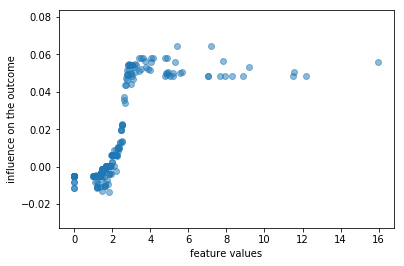

In [6]:
tmp = np.argsort(feature_importances_)[-2]
print(tmp,data.columns[tmp], rf.feature_importances_[tmp])
ind = tmp
plt.scatter(X_test[:,ind], out.loc[:,'f'+str(ind)], alpha=.5)
plt.ylabel('influence on the outcome')
plt.xlabel('feature values')

In [7]:
group1 = (out.loc[:,'f45'] < -0.01) & (X_test[:,45] < 250)
group2 = (out.loc[:,'f45'] > -0.01) & (X_test[:,45] < 250) & (out.loc[:,'f45'] < 0.02)

(80,) (80,)
[45 43 44 20 19  6 35 13  5 76 39 34 36  9 66 63 48 50 51 64 49 73 53 56
 55 59 58 54 69 78 67 60 37 47 68 77 62 57 12 79 75 52 72 61 65 70  4 74
  7 71 46 21 40 31 32 38 41  3  8 18 30  1  0 26 10 42 29 27 11 33  2 15
 14 16 24 17 28 23 22 25]
[  1.8710069    1.79467062   5.43743542   1.28201665   0.16205117
  -2.11006727  -4.81528096   0.20050658   1.29029143  -1.2821428
   3.00331517   4.29604886  -0.18345923  -2.37872309   7.60452909
   5.66227913  10.42087782  14.79324581   1.6910234   -5.3735269
  -6.06309474   0.26640037  20.63937992  15.56577977  13.92592804
  27.78708399   2.87932083   4.09294877  15.04231718   3.60740783
   1.72934132   0.6361256    0.8693544    5.3032033   -1.68467655
  -2.81197614  -1.66904183  -0.40846167   1.07187883  -1.77476365
   0.32248169   1.26626189   3.60628157  -9.56998525  -9.04620584
 -15.75967944   0.25750161  -0.28727766  -1.22401161  -0.93788528
  -1.19140596  -1.07207794   0.05022157  -0.8587891   -0.5592646
  -0.60621117  -0.70

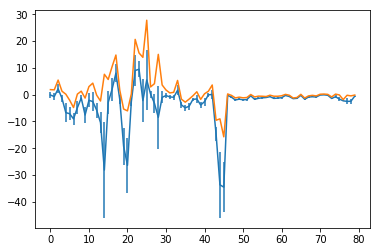

In [8]:
mean1, var1 = np.mean(X_test[group1,:], axis=0), np.std(X_test[group1,:], axis=0) / sum(group1) ** .5
mean2, var2 = np.mean(X_test[group2,:], axis=0), np.std(X_test[group2,:], axis=0) / sum(group2) ** .5
print(mean1.shape, mean2.shape)
plt.errorbar(np.arange(80), y=mean2 - mean1, yerr=(var1**2 + var2**2)**.5)
plt.errorbar(np.arange(80), y=mean2 - mean1 + 2 * (var1**2 + var2**2)**.5)
print(np.argsort(mean2 - mean1 + 2 *(var1**2 + var2**2)**.5))
print(mean2 - mean1 + 2 *(var1**2 + var2**2)**.5)

In [9]:
plt.errorbar

<function matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)>

Text(0, 0.5, 'H3K4me1_c14c')

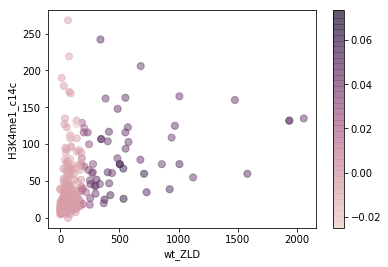

In [10]:
ind1 = 45
ind2 = 20
plt.scatter(X_test[:,ind1], X_test[:,ind2], c = out.loc[:,'f'+str(ind1)] , s = 50, cmap = sns.cubehelix_palette(as_cmap=True), alpha=.5)
plt.colorbar()
plt.xlabel(data.columns[ind1])
plt.ylabel(data.columns[ind2])

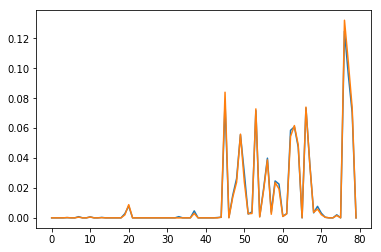

In [12]:
plt.plot(rf.feature_importances_)
plt.plot(oob_feature_importance(rf, X_train, y_train))


In [13]:
out = oob_feature_importance(rf, X_train, y_train)

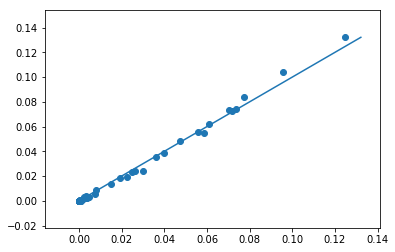

In [21]:
plt.scatter(rf.feature_importances_, out)
plt.plot([0, max(out)], [0, max(out)])

In [20]:
(max(out) / max(rf.feature_importances_)) ** -1

0.9443626304233155